# Oasis Infobytes
## Data Science Internship
## Author : Aparnna S
### Task 3: Car Price Prediction with Machine learning

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset

data= pd.read_csv("C:/Users/aparn/Desktop/Oasis Infobytes/car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.size

2709

In [8]:
data.shape

(301, 9)

In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
data.duplicated().sum()

2

In [12]:
data.drop_duplicates(keep='first',inplace=True)
data.duplicated().sum()

0

In [14]:
print(data.Fuel_Type.value_counts())
print(data.Selling_type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Selling_type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


In [15]:
# Encoding the categorical data

data['Fuel_Type'].replace({"Petrol":0,"Diesel":1,"CNG":2},inplace=True)
data['Selling_type'].replace({"Dealer":0,"Individual":1},inplace=True)
data['Transmission'].replace({"Manual":0,"Automatic":1},inplace=True)

In [23]:
# Spliting the data into Train and test data

x=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']

In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [27]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [28]:
# Prediction on training data

Prediction1=linear_model.predict(x_train)

In [30]:
error1=metrics.r2_score(y_train,Prediction1)
print('R2 squared Error on training data:',error1)

R2 squared Error on training data: 0.8826669853800193


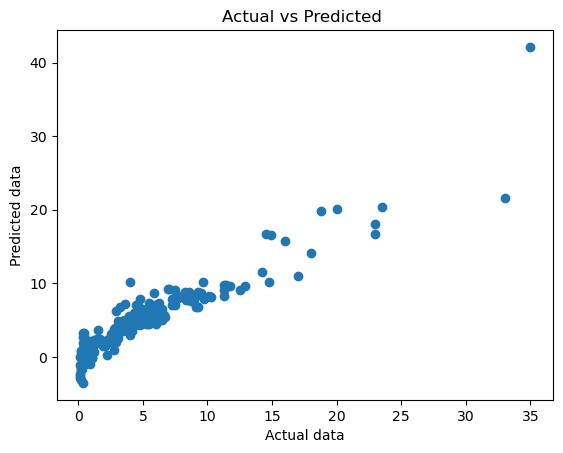

In [31]:
# Visualization of predicted and actual training data

plt.scatter(y_train,Prediction1)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual vs Predicted ')
plt.show()

In [32]:
# Prediction on training data

Prediction2=linear_model.predict(x_test)

In [33]:
error2=metrics.r2_score(y_test,Prediction2)
print('R2 squared Error on testing data:',error2)

R2 squared Error on testing data: 0.7895425396611002


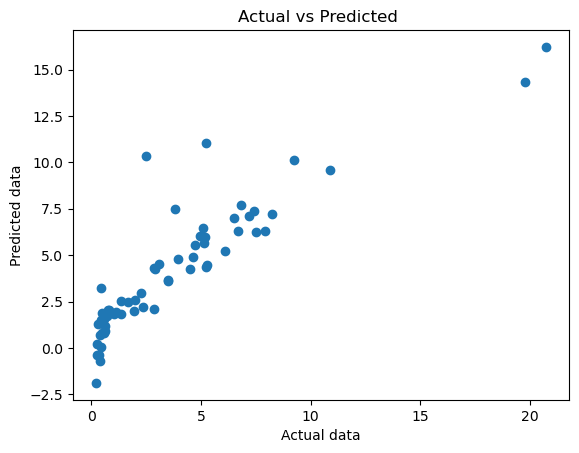

In [34]:
# Visualization of predicted and actual training data

plt.scatter(y_test,Prediction2)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual vs Predicted ')
plt.show()

###  Conclusion

#### A linear regression model was successfully implemented .It was observed that selling price of cars with Fuel type Diesel was higher than those having Petrol and CNG as fuel type.The r2 score of linear regression model is 88.26% which is good and predictions were quite close to selling prices.